In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix, f1_score, average_precision_score, cohen_kappa_score
from inspect import signature
from sklearn.externals import joblib
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from costcla.models import CostSensitiveRandomForestClassifier


# 1. Prepare Data

In [2]:
X_train_resampled = pd.read_csv("../3. Data Preparation/X_train_resampled.csv", index_col=0)
X_train_resampled.shape

(1848, 30)

In [3]:
y_train_resampled = pd.read_csv("../3. Data Preparation/y_train_resampled.csv", index_col=0)
y_train_resampled.shape

(1848, 1)

In [4]:
X_val = pd.read_csv("../3. Data Preparation/X_val.csv", index_col=0)
X_val.shape

(56962, 30)

In [5]:
y_val = pd.read_csv("../3. Data Preparation/y_val.csv", index_col=0, header=0)
y_val.shape

(56962, 1)

In [10]:
target_names=['Not Fraud 0', 'Fraud 1']


# 2. RandomForest Classifier

In [6]:
dim=100

In [7]:
#n_estimators_list = [21, 27, 31, 35, 41, 51, 71, 91, 101, 131, 155, 161, 165, 191, 201]
n_estimators_list = [21, 27, 31, 35, 41, 47, 51]

avg_per_estimator = []

for n_estimators in n_estimators_list:
    
    avg = []
    for i in range(0, dim):
        clf = RandomForestClassifier(n_estimators=n_estimators, 
                                     random_state=0, n_jobs=-1, 
                                     verbose=False, oob_score=True)
        oob_score = clf.fit(X_train_resampled, y_train_resampled['Class'].values)
        print(n_estimators, i, oob_score.oob_score_)
        avg.append(oob_score.oob_score_)
        
    avg_per_estimator.append(np.mean(avg))

21 0 0.9734848484848485
21 1 0.9734848484848485
21 2 0.9734848484848485
21 3 0.9734848484848485
21 4 0.9734848484848485
21 5 0.9734848484848485
21 6 0.9734848484848485
21 7 0.9734848484848485
21 8 0.9734848484848485
21 9 0.9734848484848485
21 10 0.9734848484848485
21 11 0.9734848484848485
21 12 0.9734848484848485
21 13 0.9734848484848485
21 14 0.9734848484848485
21 15 0.9734848484848485
21 16 0.9734848484848485
21 17 0.9734848484848485
21 18 0.9734848484848485
21 19 0.9734848484848485
21 20 0.9734848484848485
21 21 0.9734848484848485
21 22 0.9734848484848485
21 23 0.9734848484848485
21 24 0.9734848484848485
21 25 0.9734848484848485
21 26 0.9734848484848485
21 27 0.9734848484848485
21 28 0.9734848484848485
21 29 0.9734848484848485
21 30 0.9734848484848485
21 31 0.9734848484848485
21 32 0.9734848484848485
21 33 0.9734848484848485
21 34 0.9734848484848485
21 35 0.9734848484848485
21 36 0.9734848484848485
21 37 0.9734848484848485
21 38 0.9734848484848485
21 39 0.9734848484848485
21 40 0.97

35 34 0.9745670995670995
35 35 0.9745670995670995
35 36 0.9745670995670995
35 37 0.9745670995670995
35 38 0.9745670995670995
35 39 0.9745670995670995
35 40 0.9745670995670995
35 41 0.9745670995670995
35 42 0.9745670995670995
35 43 0.9745670995670995
35 44 0.9745670995670995
35 45 0.9745670995670995
35 46 0.9745670995670995
35 47 0.9745670995670995
35 48 0.9745670995670995
35 49 0.9745670995670995
35 50 0.9745670995670995
35 51 0.9745670995670995
35 52 0.9745670995670995
35 53 0.9745670995670995
35 54 0.9745670995670995
35 55 0.9745670995670995
35 56 0.9745670995670995
35 57 0.9745670995670995
35 58 0.9745670995670995
35 59 0.9745670995670995
35 60 0.9745670995670995
35 61 0.9745670995670995
35 62 0.9745670995670995
35 63 0.9745670995670995
35 64 0.9745670995670995
35 65 0.9745670995670995
35 66 0.9745670995670995
35 67 0.9745670995670995
35 68 0.9745670995670995
35 69 0.9745670995670995
35 70 0.9745670995670995
35 71 0.9745670995670995
35 72 0.9745670995670995
35 73 0.9745670995670995


51 63 0.9751082251082251
51 64 0.9751082251082251
51 65 0.9751082251082251
51 66 0.9751082251082251
51 67 0.9751082251082251
51 68 0.9751082251082251
51 69 0.9751082251082251
51 70 0.9751082251082251
51 71 0.9751082251082251
51 72 0.9751082251082251
51 73 0.9751082251082251
51 74 0.9751082251082251
51 75 0.9751082251082251
51 76 0.9751082251082251
51 77 0.9751082251082251
51 78 0.9751082251082251
51 79 0.9751082251082251
51 80 0.9751082251082251
51 81 0.9751082251082251
51 82 0.9751082251082251
51 83 0.9751082251082251
51 84 0.9751082251082251
51 85 0.9751082251082251
51 86 0.9751082251082251
51 87 0.9751082251082251
51 88 0.9751082251082251
51 89 0.9751082251082251
51 90 0.9751082251082251
51 91 0.9751082251082251
51 92 0.9751082251082251
51 93 0.9751082251082251
51 94 0.9751082251082251
51 95 0.9751082251082251
51 96 0.9751082251082251
51 97 0.9751082251082251
51 98 0.9751082251082251
51 99 0.9751082251082251


In [11]:
avg_per_estimator

[0.9734848484848482,
 0.9745670995670995,
 0.9740259740259741,
 0.9745670995670995,
 0.9751082251082255,
 0.9761904761904764,
 0.9751082251082255]

In [12]:
final_n_estimator = n_estimators_list[avg_per_estimator.index(max(avg_per_estimator))]
print("n_est", final_n_estimator, "OOB",max(avg_per_estimator))

n_est 47 OOB 0.9761904761904764


The best number of estimator is 47

# 3. Random Forest Classifier with n=47 

In [6]:
clf = RandomForestClassifier(n_estimators=47, #final_n_estimator, 
                                     random_state=0, n_jobs=25, 
                                     verbose=False, oob_score=True)
oob_score = clf.fit(X_train_resampled, y_train_resampled['Class'].values)
print(oob_score.oob_score_)

0.9761904761904762


# 4. Feature Importance 

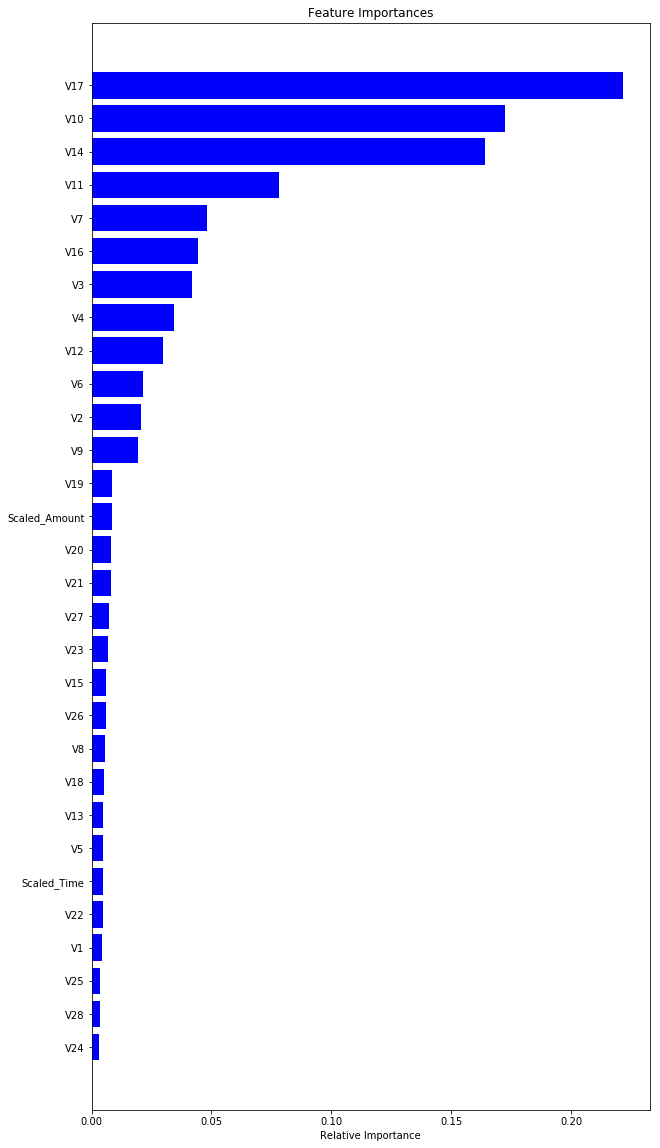

In [15]:
features = X_train_resampled.columns
importances = clf.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('Importance_Features Random Forest.png')
plt.show()

# 5. Score Value (metrics)

In [16]:

acc= accuracy_score(y_val['Class'].values, y_pred_val)
recall = recall_score( y_val['Class'].values, y_pred_val, average='binary')
precision = precision_score( y_val['Class'].values, y_pred_val)
f1 = f1_score( y_val['Class'].values, y_pred_val, average='binary')
average = average_precision_score( y_val['Class'].values, y_pred_val,)
kappa = cohen_kappa_score( y_val['Class'].values, y_pred_val)

print('Accuracy', acc)
print('Recall score', recall)
print('Precision', precision)
print('f1_score', f1)
print ('Average precision-recall score: {0:0.2f}'.format(average))
print('Kappa Score', kappa)

Accuracy 0.9966468873986166
Recall score 0.865979381443299
Precision 0.32061068702290074
f1_score 0.467966573816156
Average precision-recall score: 0.28
Kappa Score 0.4666408804948199


# 6. Confusion Matrix

In [17]:
model_Results = pd.DataFrame([['Random Forest All Features', acc, precision, recall, f1, average, kappa]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Average', 'Kappa Cohen'])

In [18]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)


Confusion matrix, without normalization
[[56687   178]
 [   13    84]]


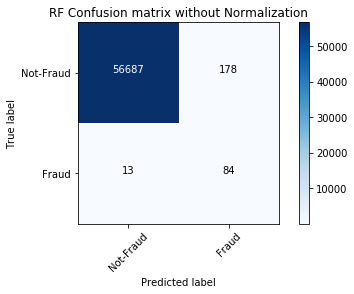

Normalized confusion matrix
[[1.   0.  ]
 [0.13 0.87]]


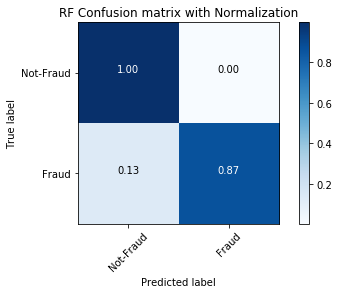

In [19]:
cm = confusion_matrix(y_val['Class'].values, y_pred_val)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'RF Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'RF Confusion matrix with Normalization')
plt.show()


# 7. Results metrics to evaluate model

In [20]:
print(classification_report(y_val['Class'].values, y_pred_val, target_names=target_names))

              precision    recall  f1-score   support

 Not Fraud 0       1.00      1.00      1.00     56865
     Fraud 1       0.32      0.87      0.47        97

    accuracy                           1.00     56962
   macro avg       0.66      0.93      0.73     56962
weighted avg       1.00      1.00      1.00     56962



In [21]:
total1=sum(sum(cm))


sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9968697793018553
Specificity :  0.865979381443299


# 8.Save metrics Results

In [22]:
model_Results['Sensitivity'] = sensitivity1

In [23]:
model_Results['Specificity'] = specificity1

In [24]:
model_Results

,Model,Accuracy,Precision,Recall,F1 Score,Average,Kappa Cohen,Sensitivity,Specificity
0,Random Forest All Features,0.996647,0.320611,0.865979,0.467967,0.27787,0.466641,0.99687,0.865979


In [ ]:
model_Results.to_csv("../Results/model_Result_final.csv")

# 9. Save Model

In [27]:
joblib.dump(clf, 'RandomForest (AllFeatures).pkl') 

['RandomForest (AllFeatures).pkl']